<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to DBSCAN

_Authors: Joseph Nelson (DC), Alexander Combs(NYC)_

---

<a id="learning-objectives"></a>
### Learning Objectives

- Explain how DBSCAN works
- Compare DBSCAN to K-Means
- Use DBSCAN in Sklearn

### Lesson Guide
- [Review of clustering](#review-of-clustering)
	- [K-means](#k-means)
- [What is DBSCAN?](#what-is-dbscan)
- [How does DBSCAN work?](#how-does-dbscan-work)
	- [The Parameters](#the-parameters)
	- [The DBSCAN Algorithm:](#the-dbscan-algorithm)
	- [DBSCAN algorithm in words/review of concept:](#dbscan-algorithm-in-wordsreview-of-concept)
	- [Algorithm visualization](#algorithm-visualization)
- [How does DBSCAN compare to K-means and Hierarchical Clustering?](#how-does-dbscan-compare-to-k-means-and-hierarchical-clustering)
	- [Pros and Cons](#pros-and-cons)
- [How do we implement DBSCAN?](#how-do-we-implement-dbscan)
	- [Key outputs](#key-outputs)
- [How do you know what good estimates of epsilon and min pts are?](#how-do-you-know-what-good-estimates-of-epsilon-and-min-pts-are)
- [Additional resources](#additional-resources)


<a id="review-of-clustering"></a>
## Review of clustering
---

- Clustering is an unsupervised learning technique we employ to group “similar” data points together
- With unsupervised learning, remember: there is no clear objective, there is no “right answer” (hard to tell how we’re doing), there is no response variable, just observations with features, and labeled data is *not* required

![](./assets/images/clusters.png)

<a id="k-means"></a>
### K-means
![](./assets/images/Kmeans_animation.gif)

**Pros:**
- Easy to implement even on relatively large data sets ( ~$O(n)$ )
- Usually "good enough" results

**Cons:**
- Requires an arbitrary k
- Sensitive to outliers (k-medians is more robust)
- With random initial centroids lacks repeatability (but can be seeded)
- Works best if data conforms to circular -> spherical -> hyperspherical shape (n.b. using means)

<a id="what-is-dbscan"></a>
## What is DBSCAN?
---

- DBSCAN: Density-Based Spatial Clustering of Applications with Noise
- For DBSCAN, clusters of high density are separated by clusters of low density
- DBSCAN is the most widely used and applicable clustering algorithm 
    - given that it takes minimum predefined input and can discover clusters of any shape, not just the sphere-like clusters that k-means often computes. This way, we can discover less pre-defined patterns and glean some more useful insights.
    
**Why Density?**

Because DBSCAN uses a neighbor-based polling approach. It is ideal for clusters of that have similar variance.

**Why noise?**

Because not every point will be associated with a cluster. Some are left as outlier points.

<a id="how-does-dbscan-work"></a>
## How does DBSCAN work?
---

- DBSCAN is a density based clustering algorithm, meaning that the algorithm
finds clusters by seeking areas of the dataset that have a higher density of points
than the rest of the dataset.
- Given this, unlike in our previous examples, after you apply DBSCAN there may be data points that aren't assigned to any cluster at all!

<a id="the-parameters"></a>
### The Parameters
When we use DBSCAN, it requires two input parameters: 

**Min Points** - This is the minimum number of points required to form a cluster.

**Epsilon** - This is the maximum spanning distance that a point can be from the polling point in order to be recruited to the cluster.

<a id="the-dbscan-algorithm"></a>
<a id="the-dbscan-algorithm"></a>
### The DBSCAN Algorithm:
1. Choose an “epsilon” and “min_samples”
2. Pick an arbitrary point, and check if there are at least “min_samples” points
within distance “epsilon”
    - If yes, add those points to the cluster and check each of the new points
    - If no, choose another arbitrary point to start a new cluster
3. Stop once all points have been checked

> Note that some data may not be assigned to clusters!

![](./assets/images/dbscan.png)

<a id="dbscan-algorithm-in-wordsreview-of-concept"></a>

### DBSCAN algorithm in words/review of concept:
DBSCAN will take the epsilon and minimum points we provided it and cluster all of
the points in a neighborhood, first passing the minimum points requirement and
then clustering each of the points within epsilon distance to form the clusters.

Once one cluster is formed, the algorithm then moves to a new datapoint, and
seeks to find related points to form yet another cluster; this will continue until
DBSCAN simply runs out of points!

<a id="algorithm-visualization"></a>

### Algorithm visualization
- http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- Let’s play with this a bit^^^
- Independently, select the “Pimpled Smiley” distribution of points. 
    - What is an optimal epsilon? 
    - What about minimum number of points?

> Fitting DBSCAN is kind of like organically growing clusters.

<a id="how-does-dbscan-compare-to-k-means-and-hierarchical-clustering"></a>
## How does DBSCAN compare to K-means
---

- DBSCAN performs especially well with unevenly distributed, non-linear clusters.  k-Means likes "spherical" clusters.
- DBSCAN is density based. k-means is based on distance from a central point.

<a id="pros-and-cons"></a>
### Pros and Cons
DBSCAN can be useful to us when we have a lot of dense data. If we used kmeans
on this data, the algorithm would effectively give us just one large cluster!
However with DBSCAN, we can actually break down this cluster into smaller
groups to see their attributes.

- **Advantages:**
    - Clusters can be any size or shape
    - No need to choose number of clusters
    

- **Disadvantages:**
    - More parameters to tune
    - Doesn’t work with clusters of varying density
    - NOTE: Not every point is assigned to a cluster!

<a id="how-do-we-implement-dbscan"></a>
## How do we implement DBSCAN?
---

To implement DBSCAN in Python, we first import it from sklearn:

```Python
from sklearn.cluster import DBSCAN
```
Next, assuming that we are using the classic Iris dataset, we define X as the data
and y are the class variables

```Python 
X, y = iris.data, iris.target
```
Next, we call DBSCAN from sklearn:

```Python
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)
```

**Given the above input, what have we said about our clusters?**

- Here, we've set epsilon to a standard value of .3 and set the minimum number of
points at 10, and then fit the model to our data X.

<a id="key-outputs"></a>
<a id="key-outputs"></a>
### Key outputs
- The DBSCAN algorithm in Python returns two items - the core samples and the
labels. The core samples are the points which the algorithm initially finds and
searches around the neighborhood to form the cluster, and the labels are simply
the cluster labels.

**Check: how many labels should we expect to receive?**

```Python
core_samples = db.core_sample_indices_
labels = db.labels_
```

<a id="how-do-you-know-what-good-estimates-of-epsilon-and-min-pts-are"></a>
## How do you know what good estimates of epsilon and min pts are?
---

As a general rule when choosing the minimum points - you should always aim to have the **minimum number of points be greater or equal to the amount of dimensions in your data, plus one**. This typically will give the algorithm a good estimation of how to evaluate the clusters. 

Estimating epsilon is a bit trickier. One option is to use a method called the k-distance, which can help visualize the best epsilon.  There is a blurb on [Wikipedai](https://en.wikipedia.org/wiki/DBSCAN) about this.  If you have the time (and motivation) see if you can implement this in Python!

<a id="additional-resources"></a>
<a id="additional-resources"></a>
## Additional resources

From the documentation http://scikitlearn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [25]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

X, y = iris.data, iris.target

ss = StandardScaler()
X = ss.fit_transform(X)

db = DBSCAN(eps=.5, min_samples=12)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=12, n_jobs=1, p=None)

In [26]:
core_samples = db.core_sample_indices_
labels = db.labels_

In [27]:
set(labels)

{-1, 0}

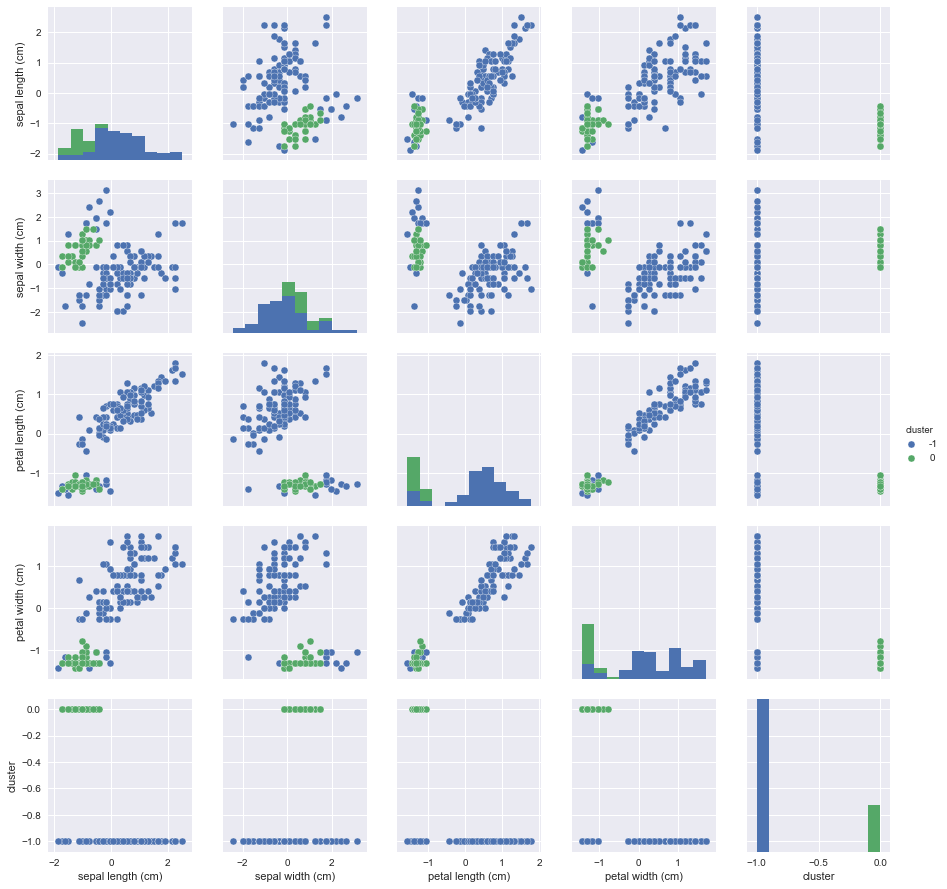

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

df = pd.DataFrame(X, columns=iris.feature_names)
df['cluster'] = labels

sns.pairplot(df, hue='cluster')

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
